# EEG Relaxation Analyzer
## (Analysis and visualization of alpha brain waves associated with relaxation)

### Introduction

Electroencephalography (EEG) is a technique used to record the brain’s electrical activity. It allows the observation of different types of brain waves depending on a person’s mental state (sleep, attention, stress, relaxation…). 
This project aims to process and visualize EEG signals from public datasets in order to isolate alpha waves (8–12 Hz)and better understand their behavior. The file S001R01.edf comes from the public EEG database PhysioNet, which contains recordings collected from human volunteers performing various tasks or resting states.

### I – Frequency Analysis 

We first analyzed the frequency distribution present in the EEG signal to identify the dominant
bands

Extracting EDF parameters from /Users/asmaabou/Downloads/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 265 samples (1.656 s)

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


/var/folders/qb/08t6z1cs407654x0tpx4jrz40000gn/T/ipykernel_37599/3840052385.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = psd.plot()
/opt/anaconda3/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


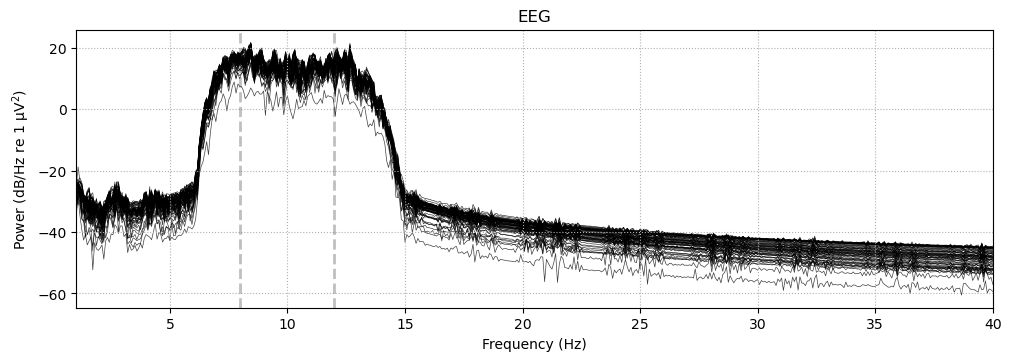

In [1]:
import mne
import matplotlib.pyplot as plt
import os
# 1. Load the EEG file (.edf)
raw = mne.io.read_raw_edf("/Users/asmaabou/Downloads/S001R01.edf", preload=True)
# 2. Filter the signal to keep only the alpha band (8–12 Hz)
raw.filter(8., 12.)
# 3. Compute the power spectrum between 1 and 40 Hz
psd = raw.compute_psd(fmin=1, fmax=40)
# 4. Plot the EEG spectrum
fig = psd.plot()
# 5. Create the "results" folder
os.makedirs("resultat_EEG", exist_ok=True)
# 6. Save the figure in the results folder
fig.savefig("resultat_EEG/spectre_alpha.png")

#### Interpretation
The power spectrum reveals a distinct peak between 8 and 12 Hz, corresponding to the alpha
frequency band. This range is known to dominate during states of relaxed wakefulness, particularly
when the eyes are closed and visual input is minimal.
Such activity reflects the brain’s transition into an idling state, where cortical areas,especially in the
occipital and parietal regions, reduce their processing load. The prominence of alpha rhythms in this
recording therefore indicates a calm, resting mental state, consistent with physiological relaxation
rather than active cognition.
    
### II – Temporal EEG Analysis
We then visualized the EEG signal in the time domain, focusing only on the alpha frequency band.

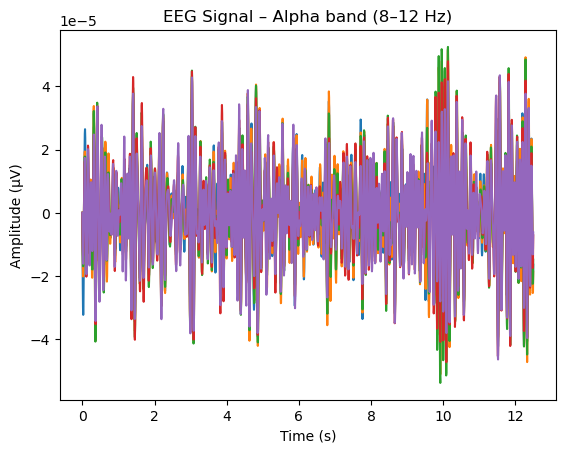

In [3]:
data, times = raw[:5, :2000] # 5 electrodes, 2000 samples (~12 s)
plt.plot(times, data.T)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("EEG Signal – Alpha band (8–12 Hz)")
plt.savefig("results/signal_alpha.png")
plt.show()

#### Interpretation

The EEG signal filtered between 8 and 12 Hz shows regular oscillations recorded across several electrodes, corresponding to alpha activity. These waves, synchronized across different brain regions, reflect a calm and relaxed resting state, typical of a subject with eyes closed.

## Conclusion
This project highlights the presence of alpha activity in real EEG recordings. Both frequency and time-domain analyses confirm the dominance of alpha waves, associated with mental relaxation and wakeful rest.
Through this mini-project, we demonstrate how Python and the MNE library can be used to extract, filter, and visualize meaningful information from EEG data.
